# MPG dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# load the dataset

In [2]:
df=pd.read_csv('mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Checks the unique values

In [5]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # check the unique valuues of every column 

Unique values in mpg: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Unique values in cylinders: [8 4 6 3 5]
Unique values in displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108. 

In [6]:
df = df.replace("?", np.nan)  # Convert "?" to NaN in the entire DataFrame
df = df.apply(pd.to_numeric, errors='ignore')  # Convert only numeric columns


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21452\1164021300.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert only numeric columns


In [7]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # check the unique valuues of every column 

Unique values in mpg: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Unique values in cylinders: [8 4 6 3 5]
Unique values in displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108. 

In [8]:
df1=df.drop('car name',axis=1)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


# Apply Label_Encoder method

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Loop over all object (categorical) columns and encode
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col].astype(str))

df1


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [11]:
for col in df1.columns:
    print(f"Unique values in {col}: {df1[col].unique()}") # check the unique valuues of every column 

Unique values in mpg: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Unique values in cylinders: [8 4 6 3 5]
Unique values in displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108. 

# Checking missing values

In [12]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [13]:
df1.fillna(df1.mean(),inplace=True)

In [14]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

<Axes: xlabel='weight', ylabel='Count'>

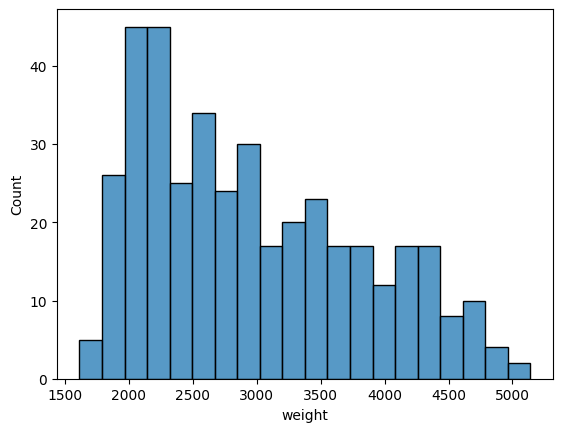

In [35]:
sns.histplot(data=df1,x='weight',bins=20)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_21452\1192402745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='origin',data=df,palette='rainbow')


<Axes: xlabel='origin', ylabel='count'>

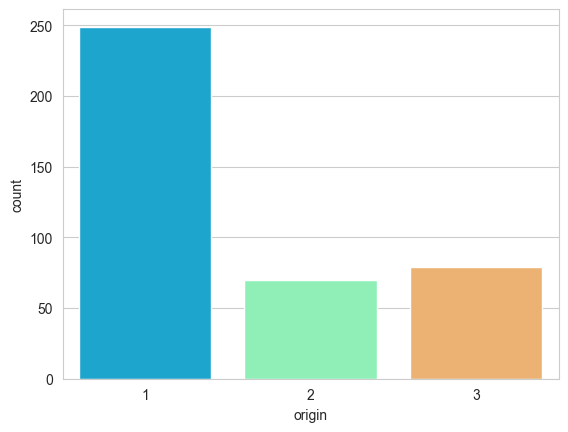

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='origin',data=df,palette='rainbow')

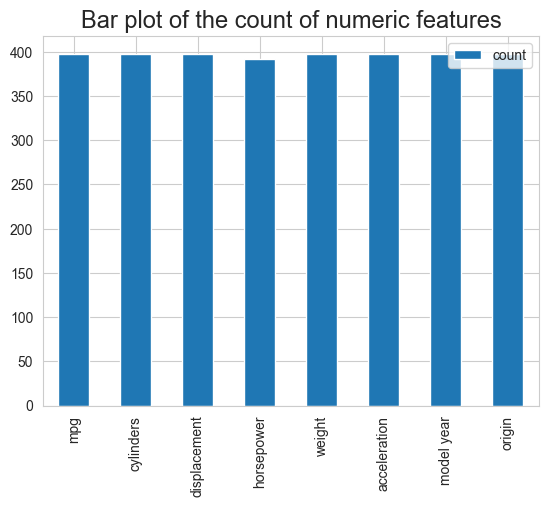

In [38]:
# makes the graphs 
dfT=df.describe().T
dfT['count']=df.count()# add a count column manually

dfT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)
plt.show()

# Handle outliers

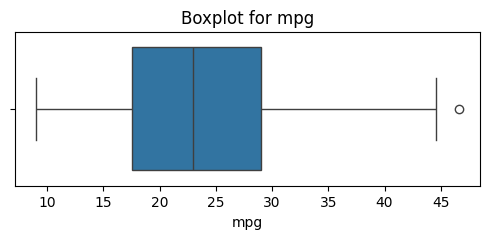

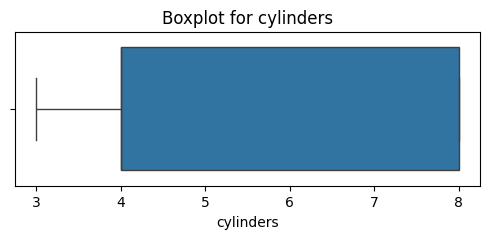

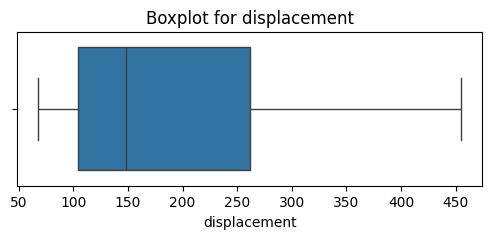

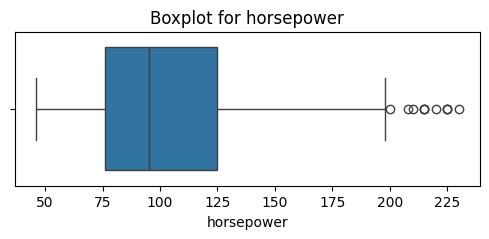

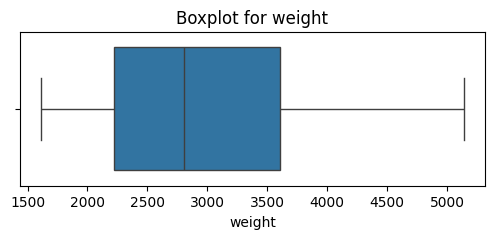

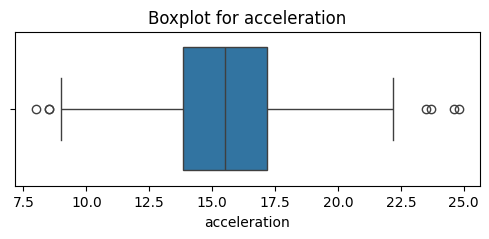

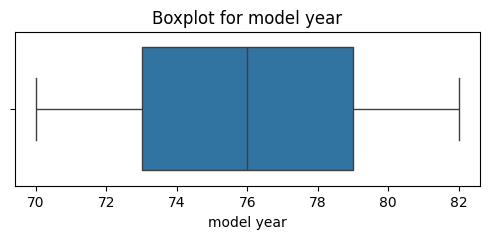

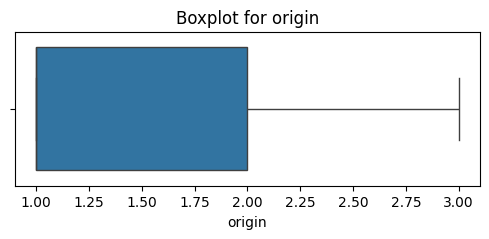

In [16]:
# For all numeric columns
for col in df1.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [20]:
def remove_outliers_iqr(df1, cols):
    for col in cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]
    return df1

# Example usage: only handle outliers for selected columns
cols_to_clean = ['mpg', 'horsepower','acceleration']
df2= remove_outliers_iqr(df1, cols_to_clean)


In [21]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

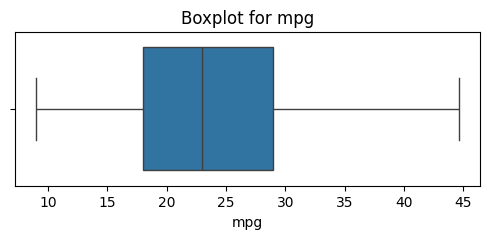

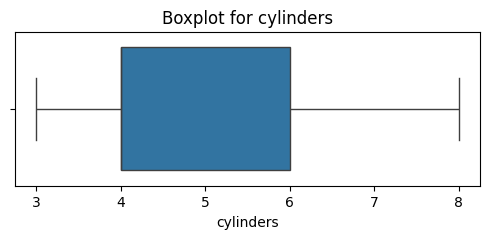

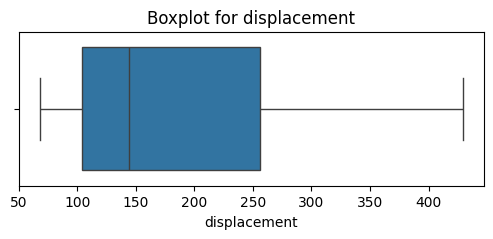

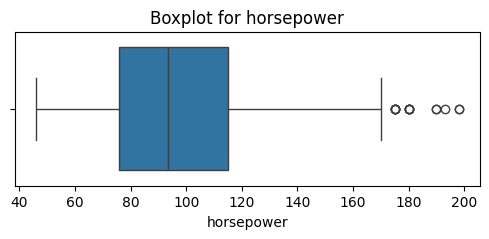

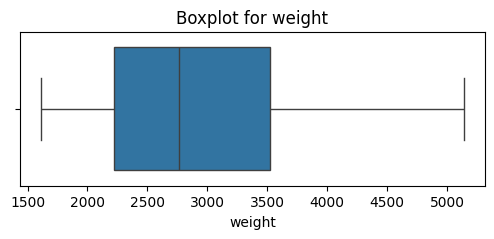

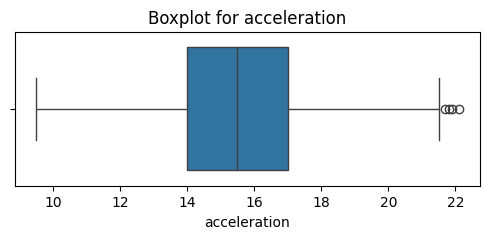

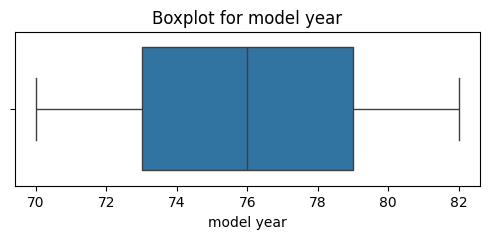

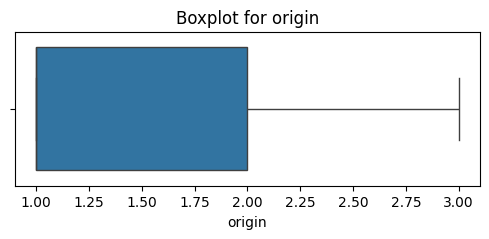

In [22]:
# For all numeric columns
for col in df2.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Split the data

In [24]:
X=df2.drop('origin',axis=1)
y=df2['origin']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------
# STEP 4: Handle imbalance (SMOTE)
# --------------------------
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



# Train_model

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)
#predict the model
pred=model.predict(X_test)

from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2 = r2_score(y_test, pred)
r2

Mean absolute error (MAE): 0.38706204606687905
Root mean square error (RMSE): 0.4946039301975115


0.567095439981256

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
#predict the model
pred1=model1.predict(X_test)

from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,pred1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,pred1)))

r2 = r2_score(y_test, pred1)
r2

Mean absolute error (MAE): 0.17697368421052634
Root mean square error (RMSE): 0.31089217965143645


0.8289604166666666

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
model2=SVR()
model2.fit(X_train,y_train)

#predict the model
pred2=model2.predict(X_test)

from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,pred2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,pred2)))

r2 = r2_score(y_test, pred2)
r2


Mean absolute error (MAE): 0.26297412147913635
Root mean square error (RMSE): 0.4628792040006978


0.6208488536462187

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)

#predict the model
pred3=model3.predict(X_test)

from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,pred3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,pred3)))

r2 = r2_score(y_test, pred3)
r2


Mean absolute error (MAE): 0.21052631578947367
Root mean square error (RMSE): 0.512989176042577


0.534313725490196